In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import scipy.signal
import shapely.geometry
import pathlib

import openeo
from openeo.rest.job import RESTJob
from openeo.rest.conversions import timeseries_json_to_pandas

%matplotlib inline

In [2]:
DEFAULT_FIGSIZE = (9, 6)

def show_tiff(filename:str, figsize=DEFAULT_FIGSIZE, vmin=None, vmax=None, rescale_percentile=97, add_colorbar=False):
    """Small helper to load a geotiff and visualize it"""
    with rasterio.open(filename) as ds:
        data = ds.read()

    fig, ax = plt.subplots(figsize=figsize)

    if len(data.shape) == 3:
        if data.max() > 500:
            p = np.percentile(data, rescale_percentile, axis=[1,2])
            data = data / p[:, None, None]
            data = np.clip(data, 0, 1)        
        data = np.moveaxis(data, 0, 2)
        if data.shape[2]<3:
            data = data[:,:,0]
        
    im = ax.imshow(data, vmin=vmin, vmax=vmax,cmap="RdYlGn")
    if add_colorbar:
        fig.colorbar(im, ax=ax, fraction=0.05)

out_dir = pathlib.Path("output")
out_dir.mkdir(parents=True, exist_ok=True)

In [3]:
openeo.client_version()

'0.8.1a2'

# Create a connection

It all starts with creating a connection to the desired openEO backend as follows:


In [4]:
ee_url: str = "https://earthengine.openeo.org"

con = openeo.connect("https://earthengine.openeo.org")
con

<Connection to 'https://earthengine.openeo.org/v1.0' with NullAuth>

In [5]:
con.list_collections()

ale.edu/research/global-surface-uhi-explorer'}]},
 {'stac_version': '1.0.0',
  'stac_extensions': [],
  'type': 'Collection',
  'id': 'YALE/YCEO/UHI/UHI_all_averaged/v4',
  'title': 'YCEO Surface Urban Heat Islands: Spatially-averaged daytime and nighttime intensity for annual, summer, and winter',
  'description': "'This dataset contains annual, summertime, and wintertime surface urban\nheat island (SUHI) intensities for day and night for over 10,000 urban clusters\nthroughout the world. The dataset was created using the MODIS 8-day TERRA and\nAQUA land surface temperature (LST) products, the Landscan urban extent\ndatabase, the Global Multi-resolution Terrain Elevation Data 2010, and the\nEuropean Space Agency (ESA) Climate Change Initiative (CCI) land cover data\nusing the Simplified Urban-Extent Algorithm. The product is available both at\nthe pixel level (at 300 m resolution after downscaling) and as urban cluster\nmeans from 2003 to 2018. The monthly composites are only available as urban\ncluster means.\n\nA summary of older versions,\nincluding changes from the dataset created and analyzed in the originally\npublished manuscript can be found on the\n[Yale Center for Earth Observation website](https://yceo.yale.edu/research/global-surface-uhi-explorer).\nThe dataset can also be explored using the [Global Surface UHI\nExplorer web application](https://yceo.users.earthengine.app/view/uhimap).\n\nThe dataset is split into the following six components:\n\n1. **UHI_all_averaged:** Image containing cluster-mean\ncomposite daytime and nighttime SUHI intensity for annual, summer,\nand winter.\n\n2. **UHI_monthly_averaged:** Image containing cluster-mean\nmonthly composites of daytime and nighttime SUHI intensity.\n\n3. **UHI_yearly_averaged:** Image collection of cluster-mean\nyearly composites of daytime and nighttime SUHI intensity from 2003.\nto 2018.\n\n4. **UHI_yearly_pixel:** Image collection of spatially\ndisaggregated (nominal scale of 300 m) annual daytime and nighttime\nSUHI intensity from 2003 to 2018.\n\n5. **Summer_UHI_yearly_pixel:** Image collection of spatially\ndisaggregated (nominal scale of 300 m) summertime daytime and\nnighttime SUHI intensity from 2003 to 2018.\n\n6. **Winter_UHI_yearly_pixel:** Image collection of spatially\ndisaggregated (nominal scale of 300 m) wintertime daytime and\nnighttime SUHI intensity from 2003 to 2018.\n'\n\n\nThis asset is the first component.",
  'license': 'proprietary',
  'providers': [{'name': 'Yale Center for Earth Observation (YCEO)',
    'roles': ['producer', 'licensor'],
    'url': 'https://yceo.yale.edu/research/global-surface-uhi-explorer'},
   {'name': 'Google Earth Engine',
    'roles': ['host'],
    'url': 'https://developers.google.com/earth-engine/datasets/catalog/YALE_YCEO_UHI_UHI_all_averaged_v4'}],
  'extent': {'spatial': {'bbox': [[-180, -49.98, 180, 69.7]]},
   'temporal': {'interval': [['2003-01-01T00:00:00Z',
      '2018-12-31T00:00:00Z']]}},
  'links': [{'rel': 'self',
    'href': 'https://earthengine.openeo.org/v1.0/collections/YALE/YCEO/UHI/UHI_all_averaged/v4',
    'type': 'application/json'},
   {'rel': 'parent',
    'href': 'https://earthengine.openeo.org/v1.0/collections',
    'type': 'application/json'},
   {'rel': 'root',
    'href': 'https://earthengine.openeo.org/v1.0/',
    'type': 'application/json'},
   {'title': 'Run the example for YALE/YCEO/UHI/UHI_all_averaged/v4 in the Google Playground',
    'rel': 'related',
    'href': 'https://code.earthengine.google.com/?scriptPath=Examples:Datasets/YALE_YCEO_UHI_UHI_all_averaged_v4',
    'type': 'text/html',
    'code': 'JavaScript'},
   {'rel': 'preview',
    'href': 'https://mw1.google.com/ges/dd/images/YALE_YCEO_UHI_averaged_sample.png',
    'type': 'image/png'},
   {'rel': 'license',
    'href': 'https://developers.google.com/earth-engine/datasets/catalog/YALE_YCEO_UHI_UHI_all_averaged_v4#terms-of-use',
    'type': 'text/html'},
   {'rel': 'license',
    'href': 'https://yceo.yale.edu/research

In [6]:
con.describe_collection("")

e Simplified Urban-Extent Algorithm. The product is available both at\nthe pixel level (at 300 m resolution after downscaling) and as urban cluster\nmeans from 2003 to 2018. The monthly composites are only available as urban\ncluster means.\n\nA summary of older versions,\nincluding changes from the dataset created and analyzed in the originally\npublished manuscript can be found on the\n[Yale Center for Earth Observation website](https://yceo.yale.edu/research/global-surface-uhi-explorer).\nThe dataset can also be explored using the [Global Surface UHI\nExplorer web application](https://yceo.users.earthengine.app/view/uhimap).\n\nThe dataset is split into the following six components:\n\n1. **UHI_all_averaged:** Image containing cluster-mean\ncomposite daytime and nighttime SUHI intensity for annual, summer,\nand winter.\n\n2. **UHI_monthly_averaged:** Image containing cluster-mean\nmonthly composites of daytime and nighttime SUHI intensity.\n\n3. **UHI_yearly_averaged:** Image collection of cluster-mean\nyearly composites of daytime and nighttime SUHI intensity from 2003.\nto 2018.\n\n4. **UHI_yearly_pixel:** Image collection of spatially\ndisaggregated (nominal scale of 300 m) annual daytime and nighttime\nSUHI intensity from 2003 to 2018.\n\n5. **Summer_UHI_yearly_pixel:** Image collection of spatially\ndisaggregated (nominal scale of 300 m) summertime daytime and\nnighttime SUHI intensity from 2003 to 2018.\n\n6. **Winter_UHI_yearly_pixel:** Image collection of spatially\ndisaggregated (nominal scale of 300 m) wintertime daytime and\nnighttime SUHI intensity from 2003 to 2018.\n'\n\n\nThis asset is the first component.",
   'license': 'proprietary',
   'providers': [{'name': 'Yale Center for Earth Observation (YCEO)',
     'roles': ['producer', 'licensor'],
     'url': 'https://yceo.yale.edu/research/global-surface-uhi-explorer'},
    {'name': 'Google Earth Engine',
     'roles': ['host'],
     'url': 'https://developers.google.com/earth-engine/datasets/catalog/YALE_YCEO_UHI_UHI_all_averaged_v4'}],
   'extent': {'spatial': {'bbox': [[-180, -49.98, 180, 69.7]]},
    'temporal': {'interval': [['2003-01-01T00:00:00Z',
       '2018-12-31T00:00:00Z']]}},
   'links': [{'rel': 'self',
     'href': 'https://earthengine.openeo.org/v1.0/collections/YALE/YCEO/UHI/UHI_all_averaged/v4',
     'type': 'application/json'},
    {'rel': 'parent',
     'href': 'https://earthengine.openeo.org/v1.0/collections',
     'type': 'application/json'},
    {'rel': 'root',
     'href': 'https://earthengine.openeo.org/v1.0/',
     'type': 'application/json'},
    {'title': 'Run the example for YALE/YCEO/UHI/UHI_all_averaged/v4 in the Google Playground',
     'rel': 'related',
     'href': 'https://code.earthengine.google.com/?scriptPath=Examples:Datasets/YALE_YCEO_UHI_UHI_all_averaged_v4',
     'type': 'text/html',
     'code': 'JavaScript'},
    {'rel': 'preview',
     'href': 'https://mw1.google.com/ges/dd/images/YALE_YCEO_UHI_averaged_sample.png',
     'type': 'image/png'},
    {'rel': 'license',
     'href': 'https://developers.google.com/earth-engine/datasets/catalog/YALE_YCEO_UHI_UHI_all_averaged_v4#terms-of-use',
     'type': 'text/html'},
    {'rel': 'license',
     'href': 'https://yceo.yale.edu/research/global-surface-uhi-explorer'}]},
  {'stac_version': '1.0.0',
   'stac_extensions': [],
   'type': 'Collection',
   'id': 'YALE/YCEO/UHI/UHI_monthly_averaged/v4',
   'title': 'YCEO Surface Urban Heat Islands: Spatially-averaged monthly composites of daytime and nighttime intensity',
   'description': "'This dataset contains annual, summertime, and wintertime surface urban\nheat island (SUHI) intensities for day and night for over 10,000 urban clusters\nthroughout the world. The dataset was created using the MODIS 8-day TERRA and\nAQUA land surface temperature (LST) products, the Landscan urban extent\ndatabase, the Global Multi-resolution Terrain Elevation Data 2010, and the\nEuropean Space Agency (ESA) Climate Change Initiative (CCI) land cov

In [7]:
con.list_processes()

not be referred to any longer. The number of labels remains the same.',
   'schema': {'type': 'object', 'subtype': 'raster-cube'}},
  'exceptions': {'LabelsNotEnumerated': {'message': 'The dimension labels are not enumerated.'},
   'LabelMismatch': {'message': "The number of labels in the parameters `source` and `target` don't match."},
   'LabelNotAvailable': {'message': 'A label with the specified name does not exist.'},
   'LabelExists': {'message': 'A label with the specified name exists.'}},
  'examples': [{'title': 'Rename named labels',
    'description': 'Renaming the bands from `B1` to `red`, from `B2` to `green` and from `B3` to `blue`.',
    'arguments': {'data': {'from_parameter': 'data'},
     'dimension': 'bands',
     'source': ['B1', 'B2', 'B3'],
     'target': ['red', 'green', 'blue']}}],
  'links': [{'rel': 'example',
    'type': 'application/json',
    'href': 'https://processes.openeo.org/1.0.0/examples/rename-enumerated-labels.json',
    'title': 'Rename enumerated labels'}]},
 {'id': 'round',
  'summary': 'Round to a specified precision',
  'description': 'Rounds a real number `x` to specified precision `p`.\n\nIf the fractional part of `x` is halfway between two integers, one of which is even and the other odd, then the even number is returned.\nThis behaviour follows [IEEE Standard 754](https://ieeexplore.ieee.org/document/8766229). This kind of rounding is also called "round to nearest (even)" or "banker\'s rounding". It minimizes rounding errors that result from consistently rounding a midpoint value in a single direction.\n\nThe no-data value `null` is passed through and therefore gets propagated.',
  'categories': ['math > rounding'],
  'parameters': [{'name': 'x',
    'description': 'A number to round.',
    'schema': {'type': ['number', 'null']}},
   {'name': 'p',
    'description': 'A positive number specifies the number of digits after the decimal point to round to. A negative number means rounding to a power of ten, so for example *-2* rounds to the nearest hundred. Defaults to *0*.',
    'schema': {'type': 'integer'},
    'default': 0,
    'optional': True}],
  'returns': {'description': 'The rounded number.',
   'schema': {'type': ['number', 'null']}},
  'examples': [{'arguments': {'x': 0}, 'returns': 0},
   {'arguments': {'x': 3.56, 'p': 1}, 'returns': 3.6},
   {'arguments': {'x': -0.4444444, 'p': 2}, 'returns': -0.44},
   {'arguments': {'x': -2.5}, 'returns': -2},
   {'arguments': {'x': -3.5}, 'returns': -4},
   {'arguments': {'x': 1234.5, 'p': -2}, 'returns': 1200}],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/AbsoluteValue.html',
    'title': 'Absolute value explained by Wolfram MathWorld'},
   {'rel': 'about',
    'href': 'https://ieeexplore.ieee.org/document/8766229',
    'title': 'IEEE Standard 754-2019 for Floating-Point Arithmetic'}]},
 {'id': 'save_result',
  'summary': 'Save processed data to storage',
  'description': 'Saves processed data to the local user workspace / data store of the authenticated user. This process aims to be compatible to GDAL/OGR formats and options. STAC-compatible metadata should be stored with the processed data.\n\nCalling this process may be rejected by back-ends in the context of secondary web services.',
  'categories': ['cubes', 'export'],
  'parameters': [{'name': 'data',
    'description': 'The data to save.',
    'schema': [{'type': 'object', 'subtype': 'raster-cube'},
     {'type': 'object', 'subtype': 'vector-cube'}]},
   {'name': 'format',
    'description': 'The file format to save to. It must be one of the values that the server reports as supported output file formats, which usually correspond to the short GDAL/OGR codes. If the format is not suitable for storing the underlying data structure, a `FormatUnsuitable` exception will be thrown. This parameter is *case insensitive*.',
    'schema': {'type': 'string', 'subtype': 'output-format'}},
   {'name': 'options',
    'description': 'The file format parameters to be

In [8]:
con.authenticate_basic("group1", "test123")

<Connection to 'https://earthengine.openeo.org/v1.0' with BearerAuth>

In [9]:
bands = ["B6", "B5", "B3"]
dates = ("2021-03-06")

In [10]:
cube = con.load_collection("LANDSAT/LC08/C01/T1", bands=bands)
cube = cube.filter_bbox(west=110.83, south=-8.01, east=110.99, north=-7.83)
cube = cube.filter_temporal(dates)

In [11]:
%%time
cube.download(out_dir / "basic.tiff", format="GTIFF-THUMB")

CPU times: user 82.3 ms, sys: 0 ns, total: 82.3 ms
Wall time: 7.66 s


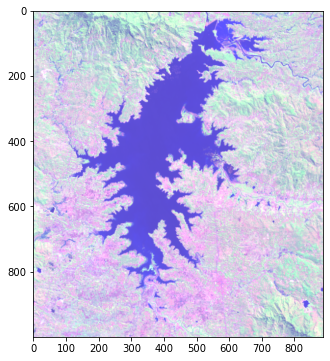

In [12]:
show_tiff(out_dir / "basic.tiff")

In [13]:
green = cube.band("B3")
nir = cube.band("B6")

ndwi = (green - nir)/(green + nir)

In [14]:
%time ndwi.download(out_dir / "ndwi.tiff", format="GTIFF-THUMB")

CPU times: user 23.4 ms, sys: 28.8 ms, total: 52.2 ms
Wall time: 17.2 s


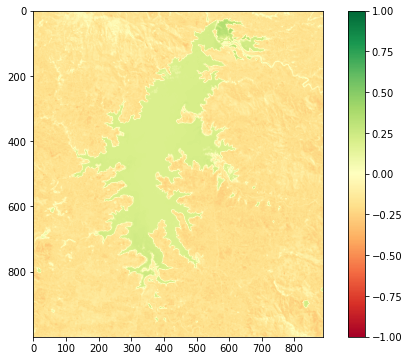

In [15]:
show_tiff(out_dir / "ndwi.tiff", vmin=-1, vmax=1, add_colorbar=True)